In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-shape-classification/face shape detector/oval/download (9).jpg
/kaggle/input/face-shape-classification/face shape detector/oval/images (2).jpg
/kaggle/input/face-shape-classification/face shape detector/oval/download (3).jpg
/kaggle/input/face-shape-classification/face shape detector/oval/download (8).jpg
/kaggle/input/face-shape-classification/face shape detector/oval/download (7).jpg
/kaggle/input/face-shape-classification/face shape detector/oval/download (5).jpg
/kaggle/input/face-shape-classification/face shape detector/oval/download (6).jpg
/kaggle/input/face-shape-classification/face shape detector/oval/images (1).jpg
/kaggle/input/face-shape-classification/face shape detector/oval/download (1).jpg
/kaggle/input/face-shape-classification/face shape detector/oval/images (3).jpg
/kaggle/input/face-shape-classification/face shape detector/oval/download (2).jpg
/kaggle/input/face-shape-classification/face shape detector/oval/download (4).jpg
/kaggle/input/face-sha

# Face Shape Finder
 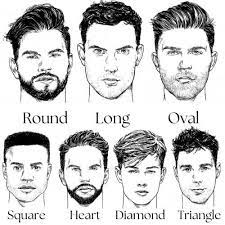

In [2]:
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image

In [3]:
train = ImageDataGenerator(rescale=1/255)

In [4]:
train_dataset = train.flow_from_directory('../input/face-shape-classification/face shape detector',target_size=(200,200),batch_size=3, class_mode = 'binary')

Found 98 images belonging to 7 classes.


In [5]:
train_dataset.class_indices

{'diamond': 0,
 'heart': 1,
 'oblong': 2,
 'oval': 3,
 'round': 4,
 'square': 5,
 'triangle': 6}

In [6]:
classess = ['diamond','heart','oblong','oval','round','square','triangle']

# Face shape finder using ANN

In [7]:
ann = models.Sequential([
        layers.Flatten(input_shape=(200,200,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(7, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(train_dataset ,epochs=5)

2022-08-14 13:51:41.050419: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-08-14 13:51:44.208168: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
33/33 [==============================] - 14s 414ms/step - loss: 8.0344 - accuracy: 0.1224
Epoch 2/5
33/33 [==============================] - 13s 405ms/step - loss: 2.0397 - accuracy: 0.1633
Epoch 3/5
33/33 [==============================] - 14s 410ms/step - loss: 1.9760 - accuracy: 0.1531
Epoch 4/5
33/33 [==============================] - 13s 405ms/step - loss: 1.9769 - accuracy: 0.1939
Epoch 5/5
33/33 [==============================] - 13s 407ms/step - loss: 1.9595 - accuracy: 0.1633


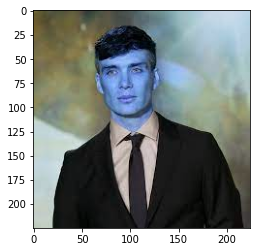

2
oblong


In [8]:
img = cv2.imread("../input/face-shape-classification/face shape detector/diamond/download (10).jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = ann.predict(img)
print(np.argmax(classes))
z = (np.argmax(classes))
print(classess[z])

# Face shape finder using CNN

In [9]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(200,200,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(7,activation='softmax'))

In [10]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
cnn.fit(train_dataset,epochs=10)

Epoch 1/10
33/33 [==============================] - 1s 20ms/step - loss: 1.9939 - accuracy: 0.0510
Epoch 2/10
33/33 [==============================] - 1s 20ms/step - loss: 1.9410 - accuracy: 0.1939
Epoch 3/10
33/33 [==============================] - 1s 20ms/step - loss: 1.9501 - accuracy: 0.1939
Epoch 4/10
33/33 [==============================] - 1s 21ms/step - loss: 1.9461 - accuracy: 0.1633
Epoch 5/10
33/33 [==============================] - 1s 41ms/step - loss: 1.9309 - accuracy: 0.1939
Epoch 6/10
33/33 [==============================] - 1s 19ms/step - loss: 1.9349 - accuracy: 0.1939
Epoch 7/10
33/33 [==============================] - 1s 19ms/step - loss: 1.9075 - accuracy: 0.2143
Epoch 8/10
33/33 [==============================] - 1s 20ms/step - loss: 1.8346 - accuracy: 0.2755
Epoch 9/10
33/33 [==============================] - 1s 20ms/step - loss: 1.7318 - accuracy: 0.3367
Epoch 10/10
33/33 [==============================] - 1s 23ms/step - loss: 1.5414 - accuracy: 0.4082


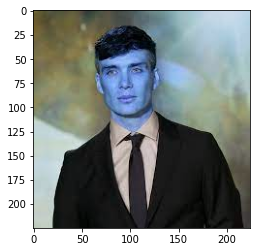

2


In [12]:
img = cv2.imread("../input/face-shape-classification/face shape detector/diamond/download (10).jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
print(np.argmax(classes))

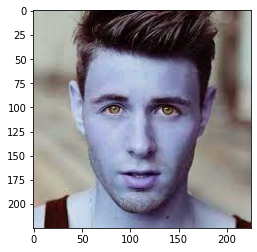

2


In [13]:
img = cv2.imread("../input/face-shape-classification/face shape detector/oval/download (1).jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
z = (np.argmax(classes))
print(z)

In [14]:
classess = ['diamond','heart','oblong','oval','round','square','triangle']

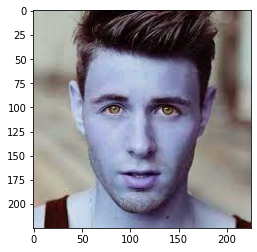

oblong


In [15]:
img = cv2.imread("../input/face-shape-classification/face shape detector/oval/download (1).jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
z = (np.argmax(classes))
print(classess[z])

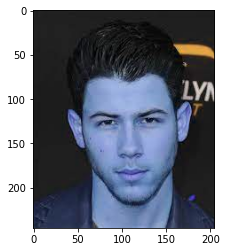

[[0.0000000e+00 1.0000000e+00 1.4649877e-31 0.0000000e+00 4.3421011e-20
  0.0000000e+00 0.0000000e+00]]
1
heart


In [16]:
img = cv2.imread("../input/face-shape-classification/face shape detector/heart/download (9).jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
print(classes)
z = (np.argmax(classes))
print(z)
print(classess[z])

In [17]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [18]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=int32)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

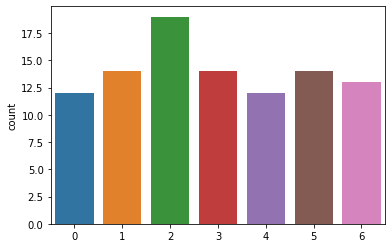

In [19]:
sns.countplot(train_dataset.classes)